In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


import warnings
warnings.filterwarnings("default")

In [2]:
def plot_over_time(df, x_col='Day', y_col='H2', hue_col='Trait',
                      title='H² of LDA Over Time',legend_loc='upper left',show_legend=True,
                      figsize=(8, 5), save_path=None):

    # Create figure
    plt.figure(figsize=figsize)

    # Line plot
    sns.lineplot(data=df, x=x_col, y=y_col, hue=hue_col, marker='o', linewidth=2, legend=show_legend)

    # Style adjustments
    plt.xticks(ticks=df[x_col].unique(), labels=df[x_col].unique(), rotation=45)  # <-- set ticks same as Day
    plt.ylabel(y_col, fontsize=12)
    plt.xlabel("Time", fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc=legend_loc)
    plt.tight_layout()

    if show_legend:
        plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc=legend_loc)

    # Save if needed
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Plot saved to {save_path}")

    plt.show()

In [3]:
def plot_heatmap(df, index_col='Trait', columns_col='Day', values_col='H2',
                            title="Heritability (H²) by Day and Metric",
                            figsize=(10, 6), cmap="YlGnBu", annot=True, fmt=".2f",
                            cbar_label="H²", show=True, save_path=None):
    
    # Pivot the data
    heatmap_data = df.pivot(index=index_col, columns=columns_col, values=values_col)
    
    # Set Seaborn style
    sns.set(style="whitegrid")
    
    # Create figure
    plt.figure(figsize=figsize)
    
    # Draw the heatmap
    ax = sns.heatmap(
        heatmap_data,
        annot=annot,
        fmt=fmt,
        cmap=cmap,
        cbar_kws={'label': cbar_label},
        linewidths=0.5,        # thin lines between cells
        linecolor='gray',
        square=False,
        annot_kws={"size": 10}, # annotation text size
        xticklabels=True,
        yticklabels=True
    )
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    
    # Place the y-axis ticks in the center of each cell
    ax.yaxis.set_tick_params(length=0)
    
    # Labels and title
    plt.title(title, fontsize=14, pad=15)
    plt.xlabel(columns_col, fontsize=12)
    plt.ylabel(index_col, fontsize=12)
    
    plt.tight_layout()
    
    # Save if needed
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Heatmap saved to {save_path}")
    
    if show:
        plt.show()

### 0 Side and top Analysis
There are 2 datasets from the experiment: top and side.

In [4]:
side_features_df1 = pd.read_csv('../data/5.25.2024_CBI.0010_York_Poplar_RGB.side_features_thresholding.csv')
top_features_df1 = pd.read_csv('../data/5.25.2024_CBI.0010_York_Poplar_RGB.top_features_thresholding.csv')


/var/folders/0r/r2dplk4d72d437ygr7ycq8kw0000gn/T/ipykernel_28809/2070176698.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc=legend_loc)


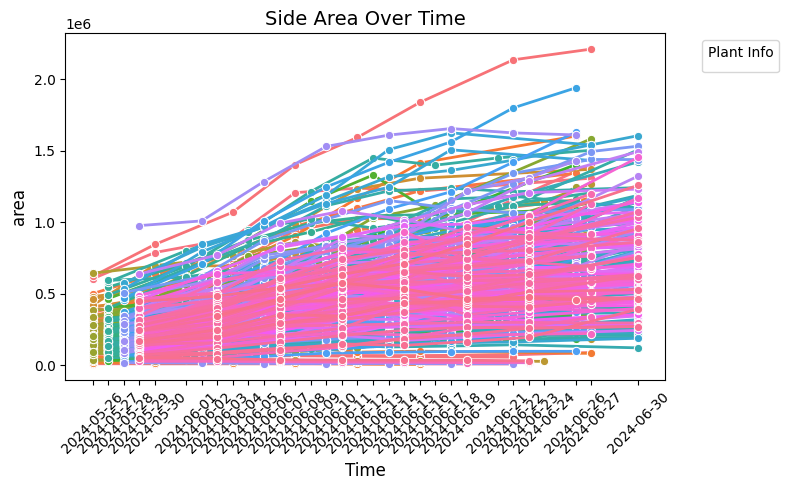

In [7]:
side_features_df1['Analyse Date'] = pd.to_datetime(side_features_df1['Analyse Date'], errors='coerce')
side_features_df1['Date'] = side_features_df1['Analyse Date'].dt.date
plot_over_time(side_features_df1, x_col='Date', y_col='area', hue_col='Plant Info',
                      title='Side Area Over Time',show_legend=False)

In [8]:
top_features_df1['Date'] =  pd.to_datetime(top_features_df1['Analyse Date']).dt.date

#### Columns

In [10]:
# delete unnecessary columns
side_features_df1 = side_features_df1.drop(columns=['Round Order', 'Round Status', 'File Path'])
top_features_df1 = top_features_df1.drop(columns=['Round Order', 'Round Status', 'File Path'])

In [12]:
print(side_features_df1.shape)
print(top_features_df1.shape)

(3415, 53)
(3415, 45)


In [11]:
only_in_sidefeature = set(side_features_df1.columns) - set(top_features_df1.columns)

only_in_topfeature = set(top_features_df1.columns) - set(side_features_df1.columns)

print("Columns only in side feature:", only_in_sidefeature)
print("Columns only in top feature:", only_in_topfeature)

Columns only in side feature: {'height', 'saturation_max', 'blue_min', 'width', 'lightness_min', 'blue_yellow_min', 'green_min', 'value_min', 'hue_max', 'red_min'}
Columns only in top feature: {'minarea_rect_width', 'minarea_rect_height'}


In [13]:
# check columns from different dataframes
# there is no 'minarea_rect_height', 'minarea_rect_width' in side_features_df, 
# and there is no 'width', 'height' in top_features_df

same_columns = (
    [c for c in side_features_df1.columns if c not in only_in_sidefeature] == 
    [c for c in top_features_df1.columns if c not in {'minarea_rect_height', 'minarea_rect_width'}]
)
print(same_columns)

True


#### Rows

There is no Random 7167 in barcodes, so change it to 167 based on side_features_df0.

The rows in top and side are the same.

The combination of Plant Info and Data are the same for the previous data and the new data, but there are 8 plant has 2 measurement in one day in the new data which cause the number of rows are different. 

In [14]:
print(f"side: {len(side_features_df1)} rows")
print(f"top: {len(top_features_df1)} rows")

side: 3415 rows
top: 3415 rows


In [20]:
side_features_df1['Plant Info'] = side_features_df1['Plant Info'].replace('7167_BESC-1170_7', '167_BESC-1170_7')
top_features_df1['Plant Info'] = top_features_df1['Plant Info'].replace('7167_BESC-1170_7', '167_BESC-1170_7')

In [21]:
# Create sets of (Plant Info, Date) tuples
set_df1 = set(side_features_df1[['Plant Info', 'Date']].itertuples(index=False, name=None))
set_df2 = set(top_features_df1[['Plant Info', 'Date']].itertuples(index=False, name=None))

In [22]:
only_in_df_side = set_df1 - set_df2
print(f"Rows only in df1: {len(only_in_df_side)}")
print(only_in_df_side)

# In df2 but not in df1
only_in_df_top = set_df2 - set_df1
print(f"Rows only in df2: {len(only_in_df_top)}")
print(only_in_df_top)

Rows only in df1: 0
set()
Rows only in df2: 0
set()


In [23]:
dupes_df1 = side_features_df1[side_features_df1.duplicated(subset=['Plant Info', 'Date'], keep=False)]
print(f"Duplicates in df1: {len(dupes_df1)}")

Duplicates in df1: 16


In [24]:
dupes_df1[['Plant Info', 'Analyse Date', 'area']].sort_values(['Plant Info', 'Analyse Date'])

,Plant Info,Analyse Date,area
334,296_BESC-1009_6,2024-05-29 00:22:39,238974.0
405,296_BESC-1009_6,2024-05-29 21:14:35,251989.0
2676,421_BESC-56_3,2024-06-21 08:48:06,569110.0
2711,421_BESC-56_3,2024-06-21 11:05:12,555750.0
2677,423_BESC-1126_8,2024-06-21 08:54:56,788983.0
2712,423_BESC-1126_8,2024-06-21 11:10:23,791258.0
2678,424_BESC-117_6,2024-06-21 09:01:34,621981.0
2713,424_BESC-117_6,2024-06-21 11:15:31,586645.0
2679,425_CHWK-27-4_3,2024-06-21 09:07:56,1113219.0
2714,425_CHWK-27-4_3,2024-06-21 11:20:20,1114222.0


In [25]:
dup_plant_info = dupes_df1['Plant Info'].unique()

In [26]:
dupes_df1_1 = top_features_df1[top_features_df1.duplicated(subset=['Plant Info', 'Date'], keep=False)]
print(f"Duplicates in df1 top: {len(dupes_df1_1)}")

Duplicates in df1 top: 16


### 1. Combine top and side

Merge by nearest time within 10 minutes for the same Plant Info

In [27]:
traits_side = side_features_df1.columns.difference(['Plant Info', 'Analyse Date', 'Date'])
traits_top = top_features_df1.columns.difference(['Plant Info', 'Analyse Date', 'Date'])

In [30]:
# Rename columns by adding 'side_' prefix
side_features_df1 = side_features_df1.rename(
    columns={trait: f"side_{trait}" for trait in traits_side}
)
# Rename columns by adding 'side_' prefix
top_features_df1 = top_features_df1.rename(
    columns={trait: f"top_{trait}" for trait in traits_top}
)

In [31]:
# Ensure datetime
side_features_df1['Analyse Date'] = pd.to_datetime(side_features_df1['Analyse Date'])
top_features_df1['Analyse Date'] = pd.to_datetime(top_features_df1['Analyse Date'])

# Sort both dataframes by Plant Info and time
side_features_df1 = side_features_df1.sort_values(['Analyse Date','Plant Info'])
top_features_df1 = top_features_df1.sort_values(['Analyse Date','Plant Info'])

# Merge by nearest timestamp within 10 minutes for the same Plant Info
features_df_side_top = pd.merge_asof(
    side_features_df1,
    top_features_df1,
    on='Analyse Date',
    by='Plant Info',
    tolerance=pd.Timedelta('10min'),  # allow up to 10 min difference
    direction='nearest'               # pick the closest timestamp
)

In [32]:
print(side_features_df1.shape)
print(top_features_df1.shape)
print(features_df_side_top.shape)
print(features_df_side_top.isna().sum())

(3415, 53)
(3415, 45)
(3415, 96)
Analyse Date             0
Plant Info               0
side_area                0
side_convex_hull_area    0
side_solidity            0
                        ..
top_saturation_var       0
top_value_mean           0
top_value_var            0
top_value_max            0
Date_y                   0
Length: 96, dtype: int64


In [33]:
features_df_side_top = features_df_side_top.drop(columns=['Date_y','Date_x'])

In [34]:
features_df_side_top.columns

Index(['Analyse Date', 'Plant Info', 'side_area', 'side_convex_hull_area',
       'side_solidity', 'side_perimeter', 'side_width', 'side_height',
       'side_longest_path', 'side_center_of_mass_x', 'side_center_of_mass_y',
       'side_convex_hull_vertices', 'side_ellipse_center_x',
       'side_ellipse_center_y', 'side_ellipse_major_axis',
       'side_ellipse_minor_axis', 'side_ellipse_angle',
       'side_ellipse_eccentricity', 'side_blue_mean', 'side_blue_var',
       'side_blue_min', 'side_blue_max', 'side_green_mean', 'side_green_var',
       'side_green_min', 'side_green_max', 'side_red_mean', 'side_red_var',
       'side_red_min', 'side_red_max', 'side_lightness_mean',
       'side_lightness_var', 'side_lightness_min', 'side_lightness_max',
       'side_green_red_mean', 'side_green_red_var', 'side_green_red_min',
       'side_green_red_max', 'side_blue_yellow_mean', 'side_blue_yellow_var',
       'side_blue_yellow_min', 'side_blue_yellow_max', 'side_hue_mean',
       'side_hue

In [35]:
features_df_side_top.to_csv('../result/side_top_features_thresholding.csv', index=False)


### 2 Impute by day

In [44]:
##### function to interpolate daily data for each plant
def interpolate_daily(df,cols_to_impute, plant_col="Plant Info", time_col="Date",method="linear"):
    # Ensure datetime format
    df[time_col] = pd.to_datetime(df[time_col])

    # Sort by Plant and Date
    df = df.sort_values([plant_col, time_col]).reset_index(drop=True)

    # Create a complete date range for each Plant.Info
    all_dates = pd.date_range(start=df[time_col].min(), end=df[time_col].max(), freq='D')
    all_plants = df[plant_col].unique()
    full_index = pd.MultiIndex.from_product([all_plants, all_dates], names=[plant_col,time_col])
    df_full = df.set_index([plant_col, time_col]).reindex(full_index).reset_index()

    # Ensure numeric type
    df_full[cols_to_impute] = df_full[cols_to_impute].apply(pd.to_numeric, errors='coerce')

    # Interpolate linearly per plant across dates, then fill edges
    df_full[cols_to_impute] = (
        df_full
        .groupby(plant_col)[cols_to_impute]
        .apply(lambda g: g.interpolate(method='linear').ffill().bfill())
    .reset_index(level=0, drop=True)
)
    return df_full

In [ ]:
##### 2.1 read non_imputed data
features_df_side_top = pd.read_csv('../result/side_top_features_thresholding.csv')
features_df_side_top.columns

Index(['Analyse Date', 'Plant Info', 'side_area', 'side_convex_hull_area',
       'side_solidity', 'side_perimeter', 'side_width', 'side_height',
       'side_longest_path', 'side_center_of_mass_x', 'side_center_of_mass_y',
       'side_convex_hull_vertices', 'side_ellipse_center_x',
       'side_ellipse_center_y', 'side_ellipse_major_axis',
       'side_ellipse_minor_axis', 'side_ellipse_angle',
       'side_ellipse_eccentricity', 'side_blue_mean', 'side_blue_var',
       'side_blue_min', 'side_blue_max', 'side_green_mean', 'side_green_var',
       'side_green_min', 'side_green_max', 'side_red_mean', 'side_red_var',
       'side_red_min', 'side_red_max', 'side_lightness_mean',
       'side_lightness_var', 'side_lightness_min', 'side_lightness_max',
       'side_green_red_mean', 'side_green_red_var', 'side_green_red_min',
       'side_green_red_max', 'side_blue_yellow_mean', 'side_blue_yellow_var',
       'side_blue_yellow_min', 'side_blue_yellow_max', 'side_hue_mean',
       'side_hue

In [38]:
features_df_side_top["Analyse Date"] = pd.to_datetime(
    features_df_side_top["Analyse Date"]
)


features_df_side_top['Date'] = features_df_side_top['Analyse Date'].dt.date

In [39]:
metric_cols = [col for col in features_df_side_top.columns if col not in ['Analyse Date','Plant Info','Date','Genotype','Replicate']]

In [ ]:
# 2.2 Make sure every (Plant, Date) pair is unique

# helper: midpoint of times within a group
def midpoint_time(series):
    return series.min() + (series.max() - series.min()) / 2
# For any (Plant, Date) that appears multiple times,
# → it averages all numeric columns (your traits).
# → and replaces all timestamps that day with the midpoint between earliest and latest.
# For (Plant, Date) with only one row, it stays unchanged.

# group by plant and date, aggregate
features_df_side_top_fixed = (
    features_df_side_top.groupby(["Plant Info", "Date"], as_index=False)
      .agg({
          "Analyse Date": midpoint_time,        # midpoint of timestamps that day
          **{
              col: "mean"
              for col in metric_cols    # average numeric traits
          }
      })
)
# clean up: sort and reset index
features_df_side_top = features_df_side_top.sort_values(["Plant Info", "Analyse Date"]).reset_index(drop=True)


In [41]:
sample_counts = features_df_side_top_fixed.groupby(['Plant Info', 'Analyse Date']).size().reset_index(name='sample_count')
all_one = (sample_counts['sample_count'] == 1).all()
print("All groups have exactly 1 sample?", all_one)

All groups have exactly 1 sample? True


In [42]:
features_df_side_top_fixed = features_df_side_top_fixed.drop(columns=['Analyse Date'])

In [ ]:
##### 2.3 impute by day based on day_time for each dataset
features_df_side_top_imputed = interpolate_daily(
    features_df_side_top_fixed,
    cols_to_impute=metric_cols,
    plant_col="Plant Info",
    time_col="Date",
    method="linear"
)


In [46]:
print(features_df_side_top_imputed.shape)

(16056, 94)


In [47]:
# ----------------------------
# other processing
## Split into 2 new columns
features_df_side_top_imputed[['Genotype', 'Replicate']] = features_df_side_top_imputed['Plant Info'].str.extract(r'^\d+_(.+)_(\d+)$')

# Convert Replicate to integer if needed
features_df_side_top_imputed['Replicate'] = features_df_side_top_imputed['Replicate'].astype(int)

In [48]:
features_df_side_top_imputed.to_csv('../result/side_top_features_thresholding_linearimputed_day.csv', index=False)


/var/folders/0r/r2dplk4d72d437ygr7ycq8kw0000gn/T/ipykernel_28809/2070176698.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc=legend_loc)


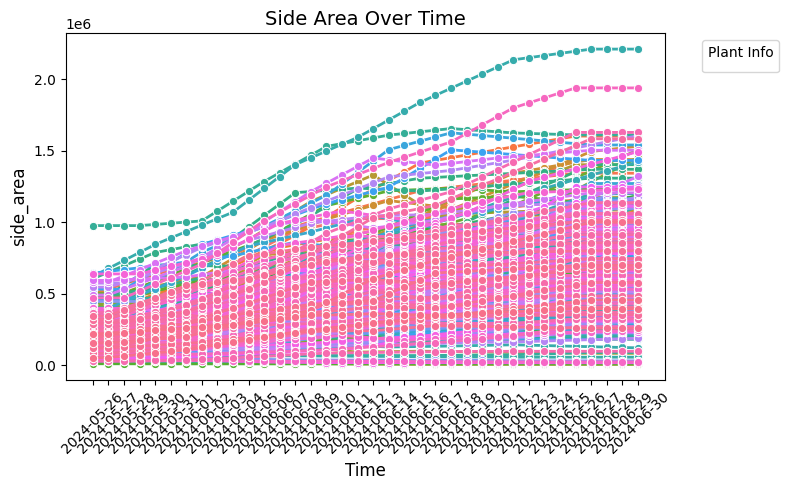

/var/folders/0r/r2dplk4d72d437ygr7ycq8kw0000gn/T/ipykernel_28809/2070176698.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc=legend_loc)


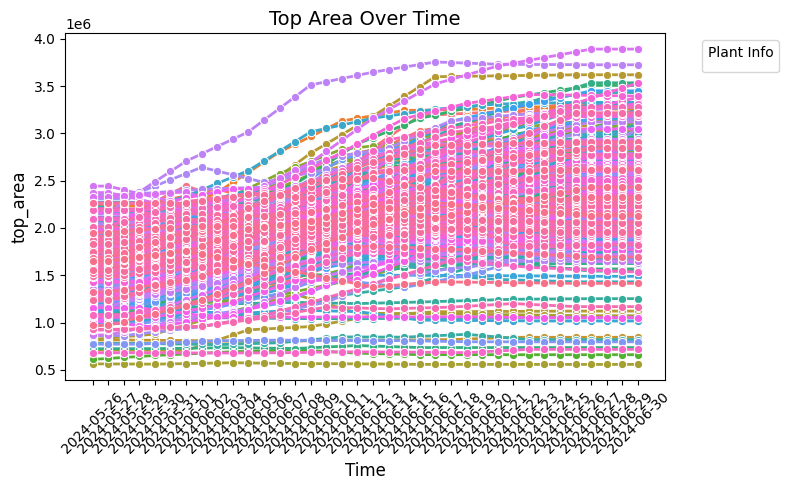

In [49]:
features_df_side_top_imputed =  pd.read_csv('../result/side_top_features_thresholding_linearimputed_day.csv')

plot_over_time(features_df_side_top_imputed, x_col='Date', y_col='side_area', hue_col='Plant Info',
                      title='Side Area Over Time',show_legend=False)
plot_over_time(features_df_side_top_imputed, x_col='Date', y_col='top_area', hue_col='Plant Info',title='Top Area Over Time',show_legend=False)

### 3 Impute by group

### 4 Check traits correlation

In [ ]:

features_df_side_top_imputed =  pd.read_csv('../result/side_top_features_thresholding_linearimputed_day.csv')

features_df = features_df_side_top_imputed[metric_cols]

In [51]:
corr_matrix = features_df.corr()  #

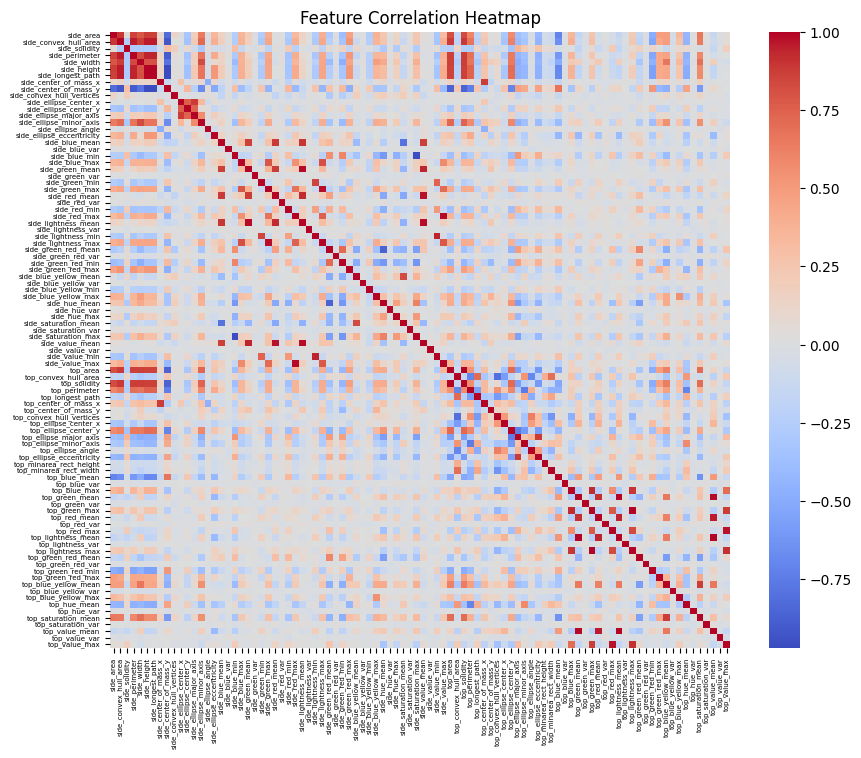

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            #annot=True, 
            fmt=".2f", cmap='coolwarm', xticklabels=True,
    yticklabels=True,cbar=True)
plt.title("Feature Correlation Heatmap")
# Reduce font size for axis labels
plt.xticks(fontsize=5, rotation=90)
plt.yticks(fontsize=5, rotation=0)
plt.title("Feature Correlation Heatmap", fontsize=12)
plt.show()

In [53]:
corr_matrix_abs = corr_matrix.abs()  # absolute correlation

# Select upper triangle (without diagonal)
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))

# Find feature pairs with correlation > threshold, e.g., 0.9
threshold = 0.9
high_corr = [(col1, col2, upper.loc[col1, col2])
             for col1 in upper.columns
             for col2 in upper.index
             if pd.notna(upper.loc[col1, col2]) and upper.loc[col1, col2] > threshold]

# Convert to DataFrame for easy viewing
high_corr_df = pd.DataFrame(high_corr, columns=['Feature1', 'Feature2', 'Correlation'])
print(high_corr_df)

                 Feature1               Feature2  Correlation
0   side_convex_hull_area         side_perimeter     0.958816
1   side_convex_hull_area            side_height     0.959545
2   side_convex_hull_area      side_longest_path     0.960070
3   side_convex_hull_area  side_center_of_mass_y     0.919952
4          side_perimeter            side_height     0.946079
5          side_perimeter      side_longest_path     0.946069
6             side_height      side_longest_path     0.995652
7             side_height  side_center_of_mass_y     0.969599
8       side_longest_path  side_center_of_mass_y     0.968028
9           side_blue_min    side_saturation_max     0.961082
10        side_green_mean    side_lightness_mean     0.990025
11        side_green_mean        side_value_mean     0.945363
12         side_green_max     side_lightness_max     0.984418
13          side_red_mean    side_lightness_mean     0.930033
14          side_red_mean        side_value_mean     0.969863
15      

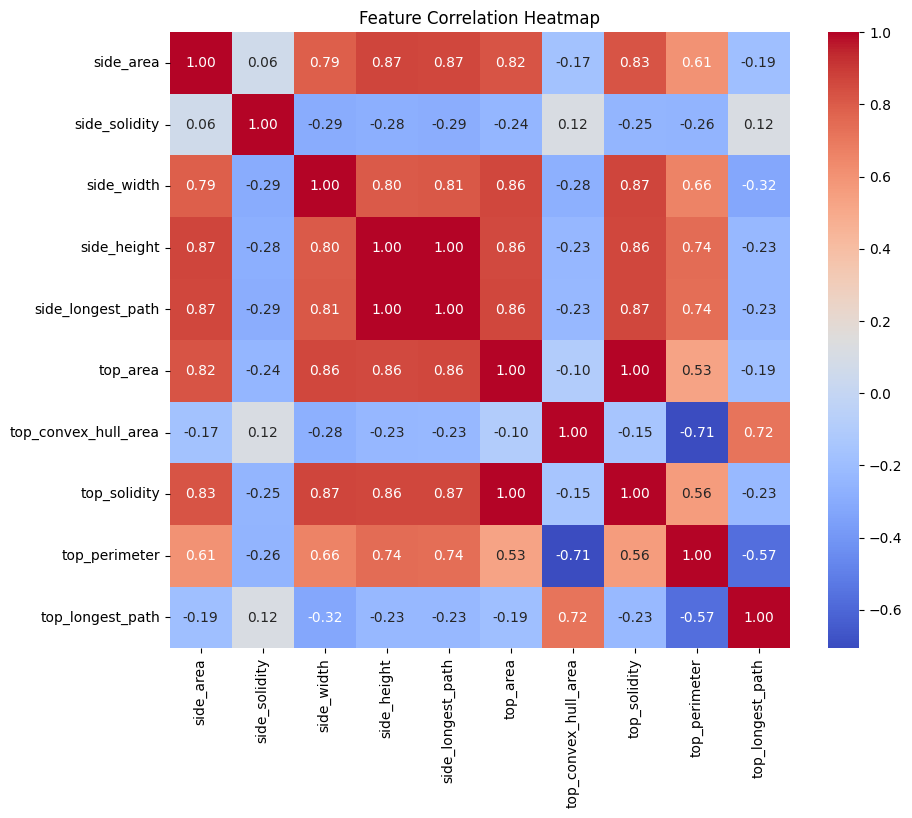

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(features_df[['side_area', 'side_solidity',  'side_width', 'side_height', 'side_longest_path','top_area', 'top_convex_hull_area',
       'top_solidity', 'top_perimeter','top_longest_path']].corr(), 
            annot=True, 
            fmt=".2f", cmap='coolwarm', xticklabels=True,
    yticklabels=True,cbar=True)
plt.title("Feature Correlation Heatmap")
# Reduce font size for axis labels
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.title("Feature Correlation Heatmap", fontsize=12)
plt.show()
#delete 'side_convex_hull_area','side_longest_path','top_longest_path','side_perimeter',

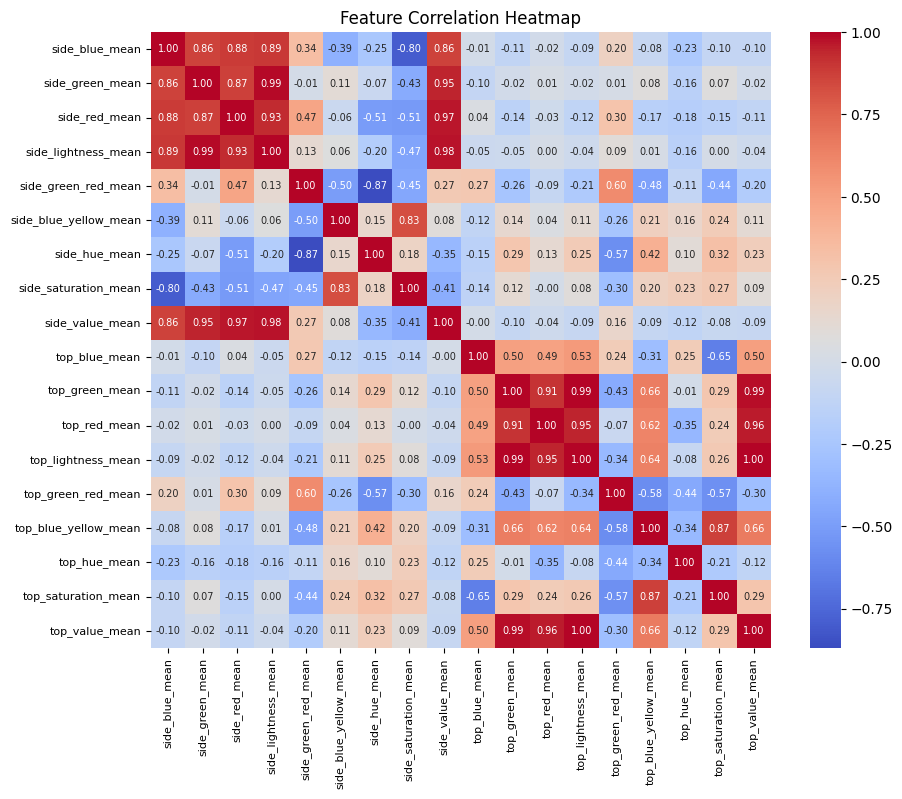

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(features_df.filter(regex='_mean$').corr(), 
            annot=True, 
            fmt=".2f", cmap='coolwarm', xticklabels=True,
    yticklabels=True,cbar=True,annot_kws={"size": 7} )
plt.title("Feature Correlation Heatmap")
# Reduce font size for axis labels
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8, rotation=0)
plt.title("Feature Correlation Heatmap", fontsize=12)
plt.show()
# red, green, blue, lightness mean (value_mean)

In [56]:
traits_high_corr = ['side_blue_mean','side_green_mean','side_red_mean','side_lightness_mean',
                    'top_green_mean','top_blue_mean','top_red_mean','top_lightness_mean',
                     'side_convex_hull_area','side_longest_path','side_perimeter',
                     'top_convex_hull_area']

In [57]:
metric_cols_corr_clean = [col for col in metric_cols if col not in traits_high_corr]

In [58]:
metric_cols_clean = [col for col in metric_cols_corr_clean if not (col.endswith('min') or col.endswith('max'))]

In [59]:
print(len(metric_cols))
print(len(metric_cols_corr_clean))
print(len(metric_cols_clean))

92
80
56


In [ ]:
#Path("../data/traits_kept_top_side.txt").write_text(",".join(metric_cols_clean))

1021

### 6. Check side_hue_max

In [60]:
features_df_side_top_imputed['side_hue_max'].describe()

count    16056.000000
mean       170.988416
std          0.148124
min        167.000000
25%        171.000000
50%        171.000000
75%        171.000000
max        171.000000
Name: side_hue_max, dtype: float64

In [61]:
features_df_side_top_imputed.groupby('Date')['side_hue_max'].describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
2024-05-26,446.0,170.995516,0.094703,169.0,171.0,171.0,171.0,171.0
2024-05-27,446.0,170.995516,0.094703,169.0,171.0,171.0,171.0,171.0
2024-05-28,446.0,170.995516,0.094703,169.0,171.0,171.0,171.0,171.0
2024-05-29,446.0,170.996413,0.075762,169.4,171.0,171.0,171.0,171.0
2024-05-30,446.0,170.997309,0.056822,169.8,171.0,171.0,171.0,171.0
2024-05-31,446.0,170.998206,0.037881,170.2,171.0,171.0,171.0,171.0
2024-06-01,446.0,170.999103,0.018941,170.6,171.0,171.0,171.0,171.0
2024-06-02,446.0,171.000000,0.000000,171.0,171.0,171.0,171.0,171.0
2024-06-03,446.0,170.998879,0.023676,170.5,171.0,171.0,171.0,171.0
